<a href="https://colab.research.google.com/github/KabeinG-7/CodeClause/blob/main/Stock-Market-Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
#from sklearn import preprocessing # how to import preprocessing
#import sklearn.preprocessing
from sklearn.model_selection import train_test_split as split

In [8]:
data=pd.read_csv('/AAPL.csv')
data.head(5)

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [9]:
df = data.reset_index()
df.head()

,index,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [11]:
data_train = pd.DataFrame(df['close'][0:int(len(df)*0.76)])
data_test = pd.DataFrame(df['close'][int(len(df)*0.76):int(len(df))])
print(data_train.shape)
print(data_test.shape)

(956, 1)
(302, 1)


In [12]:
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
data_train_array = scaler.fit_transform(data_train)
data_train_array

array([[0.29425669],
       [0.29238693],
       [0.28180343],
       [0.28360262],
       [0.27954561],
       [0.28067452],
       [0.27531221],
       [0.27030269],
       [0.26430537],
       [0.26162422],
       [0.27192549],
       [0.26987935],
       [0.2598603 ],
       [0.25809638],
       [0.26289424],
       [0.26077753],
       [0.26486982],
       [0.25583857],
       [0.26296479],
       [0.2588725 ],
       [0.26649263],
       [0.26218867],
       [0.25689692],
       [0.24123333],
       [0.24754815],
       [0.25583857],
       [0.25470966],
       [0.25160516],
       [0.24941791],
       [0.22740422],
       [0.20976505],
       [0.23241374],
       [0.24920624],
       [0.24885345],
       [0.25739081],
       [0.26931489],
       [0.27714669],
       [0.29443308],
       [0.28511959],
       [0.24610174],
       [0.2456784 ],
       [0.24102166],
       [0.22881535],
       [0.23311931],
       [0.2303676 ],
       [0.22599309],
       [0.21844352],
       [0.198

In [14]:
x_train= []
y_train= []

for i in range(100,data_train_array.shape[0]):
    x_train.append(data_train_array[i-100: i])
    y_train.append(data_train_array[i,0])

x_train , y_train = np.array(x_train) , np.array(y_train)

In [15]:
x_train.shape

(856, 100, 1)

In [16]:
model = Sequential()
model.add(LSTM(units = 50 , activation = 'relu' , return_sequences = True ,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60 , activation = 'relu' , return_sequences = True ))
model.add(Dropout(0.3))

model.add(LSTM(units = 80 , activation = 'relu' , return_sequences = True ))
model.add(Dropout(0.4))

model.add(LSTM(units = 120 , activation = 'relu' ))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [18]:
model.compile(optimizer='adam' , loss = 'mean_squared_error')
model.fit(x_train , y_train , epochs = 50)

Epoch 1/50
27/27 [==============================] - 14s 282ms/step - loss: 0.0679
Epoch 2/50
27/27 [==============================] - 8s 280ms/step - loss: 0.0141
Epoch 3/50
27/27 [==============================] - 8s 309ms/step - loss: 0.0099
Epoch 4/50
27/27 [==============================] - 7s 263ms/step - loss: 0.0111
Epoch 5/50
27/27 [==============================] - 8s 310ms/step - loss: 0.0099
Epoch 6/50
27/27 [==============================] - 10s 355ms/step - loss: 0.0093
Epoch 7/50
27/27 [==============================] - 7s 267ms/step - loss: 0.0091
Epoch 8/50
27/27 [==============================] - 8s 311ms/step - loss: 0.0084
Epoch 9/50
27/27 [==============================] - 8s 291ms/step - loss: 0.0090
Epoch 10/50
27/27 [==============================] - 8s 274ms/step - loss: 0.0089
Epoch 11/50
27/27 [==============================] - 8s 310ms/step - loss: 0.0080
Epoch 12/50
27/27 [==============================] - 7s 264ms/step - loss: 0.0066
Epoch 13/50
27/27 [====

In [19]:
past_100_days = data_train.tail(100)
final_df = past_100_days.append(data_test , ignore_index=True)

<ipython-input-19-ed909b8ec9e4>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_test , ignore_index=True)


In [20]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.42700395],
       [0.39905951],
       [0.41684233],
       [0.42408518],
       [0.43532782],
       [0.39403275],
       [0.41949084],
       [0.40057294],
       [0.37862818],
       [0.3843576 ],
       [0.41441003],
       [0.43257121],
       [0.35289984],
       [0.32106373],
       [0.33284687],
       [0.36625047],
       [0.35835901],
       [0.33663045],
       [0.28095779],
       [0.27047187],
       [0.2411221 ],
       [0.26603967],
       [0.27749851],
       [0.2360413 ],
       [0.18804389],
       [0.18696287],
       [0.16269391],
       [0.17528782],
       [0.17323388],
       [0.20944814],
       [0.20193503],
       [0.19669207],
       [0.23041998],
       [0.18647641],
       [0.17582833],
       [0.14215448],
       [0.14815415],
       [0.14291119],
       [0.1454516 ],
       [0.15545106],
       [0.12588509],
       [0.11756121],
       [0.1290741 ],
       [0.10107562],
       [0.07913086],
       [0.04615967],
       [0.02507973],
       [0.080

In [21]:
input_data.shape

(402, 1)

In [22]:
x_test = []
y_test = []

for i in range(100 , input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [23]:
x_test , y_test = np.array(x_test) , np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(302, 100, 1)
(302,)


In [24]:
#Making predictions
y_predicted = model.predict(x_test)
y_predicted.shape

10/10 [==============================] - 1s 78ms/step


(302, 1)

In [25]:
scaler.scale_

array([0.00540511])

In [26]:
scale_factor = 1/0.00669658
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

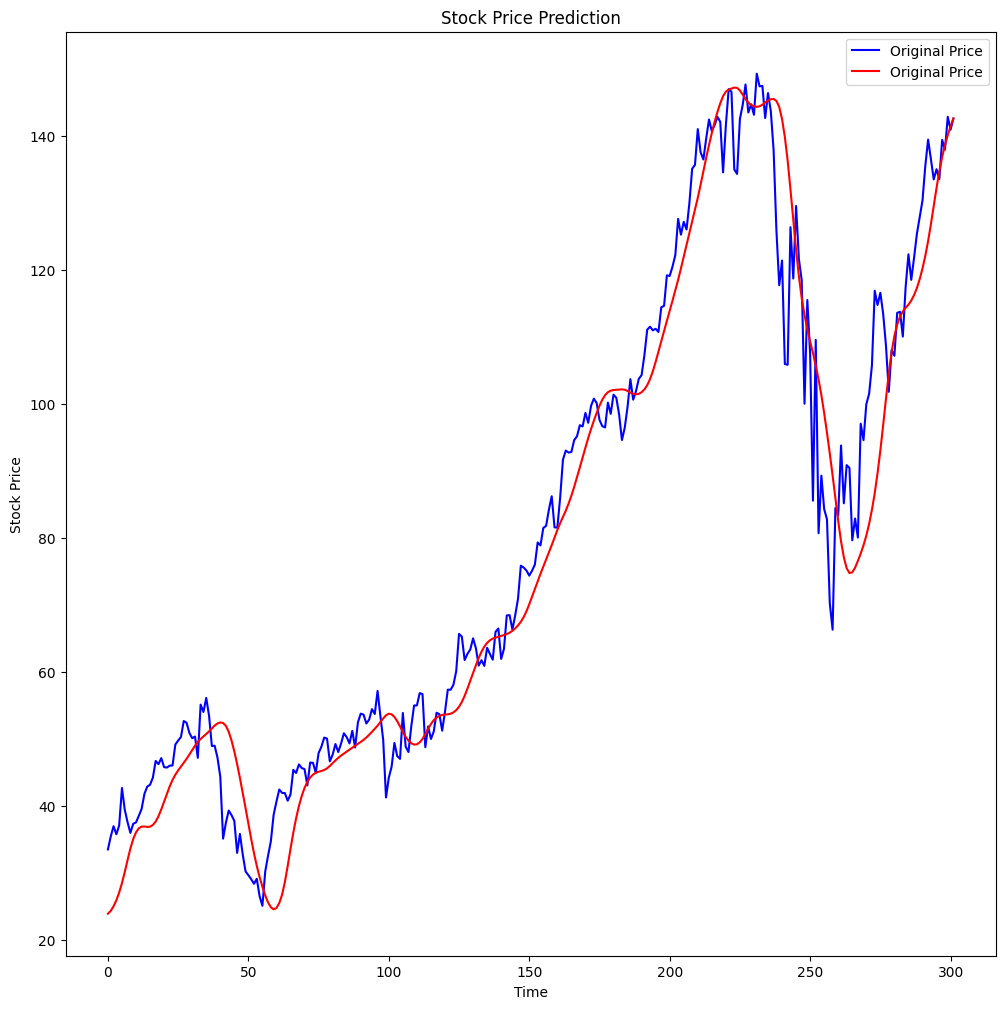

In [27]:
plt.figure(figsize=(12,12))
plt.plot(y_test , 'b' , label = 'Original Price')
plt.plot(y_predicted , 'r' , label = 'Original Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [28]:
#RMSE
from keras import backend as k
np.mean(k.sqrt(k.mean(k.square(y_predicted - y_test), axis=-1)))

50.53737946107699